# 55

## 829. Consecutive Numbers Sum
Hard

Given a positive integer N, how many ways can we write it as a sum of consecutive positive integers?

Example 1:

    Input: 5
    Output: 2
    Explanation: 5 = 5 = 2 + 3

In [1]:
from math import sqrt, ceil, floor

def consecutiveNumbersSum(N):
    '''
    answer is number of odd divisors of N
    range(1, ceil(sqrt(N)), 2) is all odd numbers up to floor(sqrt(N))
    '''
    while N%2 == 0:
        N /= 2

    if floor(sqrt(N))**2 == N:
        return 2*sum([1 for i in range(1, ceil(sqrt(N)), 2) if N%i == 0]) + 1

    else:
        return 2*sum([1 for i in range(1, ceil(sqrt(N)), 2) if N%i == 0])

consecutiveNumbersSum(5)

2

## 588. Design In-Memory File System
Hard

Design an in-memory file system to simulate the following functions:

ls: Given a path in string format. If it is a file path, return a list that only contains this file's name. If it is a directory path, return the list of file and directory names in this directory. Your output (file and directory names together) should in lexicographic order.

mkdir: Given a directory path that does not exist, you should make a new directory according to the path. If the middle directories in the path don't exist either, you should create them as well. This function has void return type.

addContentToFile: Given a file path and file content in string format. If the file doesn't exist, you need to create that file containing given content. If the file already exists, you need to append given content to original content. This function has void return type.

readContentFromFile: Given a file path, return its content in string format.

 

Example:

    Input: 
    ["FileSystem","ls","mkdir","addContentToFile","ls","readContentFromFile"]
    [[],["/"],["/a/b/c"],["/a/b/c/d","hello"],["/"],["/a/b/c/d"]]

    Output:
    [null,[],null,null,["a"],"hello"]

    Explanation:

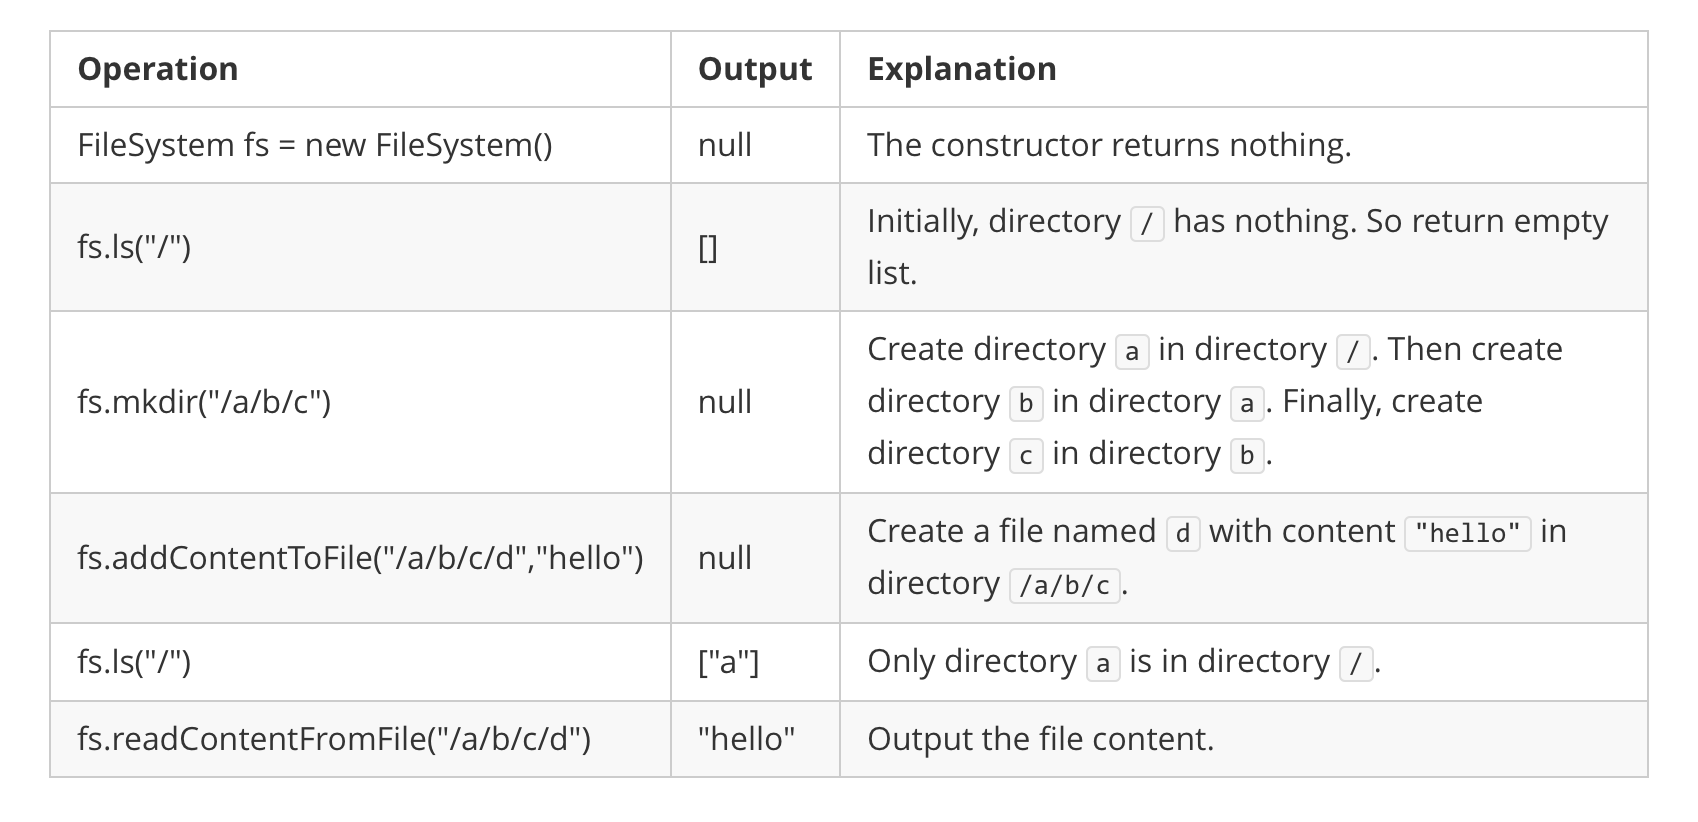

Note:

1. You can assume all file or directory paths are absolute paths which begin with / and do not end with / except that the path is just "/".
1. You can assume that all operations will be passed valid parameters and users will not attempt to retrieve file content or list a directory or file that does not exist.
1. You can assume that all directory names and file names only contain lower-case letters, and same names won't exist in the same directory.



* 下面答案有錯：

In [1]:
from pandas import DataFrame

null = None

DataFrame([["FileSystem","mkdir","ls","mkdir","ls","ls","ls","addContentToFile","ls","ls","ls"], 
            [[],["/m"],["/m"],["/w"],["/"],["/w"],["/"],["/dycete","emer"],["/w"],["/"],["/dycete"]], 
            [null,null,[],null,["m","w"],[],["m","w"],null,[],["dycete","m","w"],["d","y","c","e","t","e"]], 
            [null,null,[],null,["m","w"],[],["m","w"],null,[],["dycete","m","w"],["dycete"]]], index=['cmd', 'args', 'output', 'expected']).T

,cmd,args,output,expected
0,FileSystem,[],None,None
1,mkdir,[/m],None,None
2,ls,[/m],[],[]
3,mkdir,[/w],None,None
4,ls,[/],"[m, w]","[m, w]"
5,ls,[/w],[],[]
6,ls,[/],"[m, w]","[m, w]"
7,addContentToFile,"[/dycete, emer]",None,None
8,ls,[/w],[],[]
9,ls,[/],"[dycete, m, w]","[dycete, m, w]"


In [3]:
class FileSystem:

    def __init__(self):
        self.home = self.cur = {}

    def ls(self, path: str) -> List[str]:
        tmp = self.cur
        self.cd(path)
        res = path.strip('/').split('/')[-1] if isinstance(self.cur, str) else sorted(list(self.cur.keys()))
        self.cur = tmp
        
        return [dir for dir in res if dir != '']
        
    def cd(self, path):
        dirs = path.strip('/').split('/')
        for dir in dirs:
            if dir != '':
                self.cur = self.cur[dir]

    def mkdir(self, path: str) -> None:
        cur = self.cur
        dirs = path.strip('/').split('/')
        for dir in dirs:
            if dir not in cur:
                cur[dir] = {}
            cur = cur[dir]

    def addContentToFile(self, filePath: str, content: str) -> None:
        dirs = filePath.strip('/').split('/')
        fileName = dirs[-1]
        self.mkdir('/'.join(dirs[:-1]))
        
        tmp = self.cur
        self.cur = self.home
        self.cd('/'.join(dirs[:-1]))
        if fileName in self.cur:
            self.cur[fileName] += content
        else:
            self.cur[fileName] = content
        self.cur = tmp
        
    def readContentFromFile(self, filePath: str) -> str:
        dirs = filePath.strip('/').split('/')
        fileName = dirs[-1]
        
        tmp = self.cur
        self.cur = self.home
        self.cd('/'.join(dirs[:-1]))
        res = self.cur[fileName]
        self.cur = tmp
        
        return res
        

# Your FileSystem object will be instantiated and called as such:
# obj = FileSystem()
# param_1 = obj.ls(path)
# obj.mkdir(path)
# obj.addContentToFile(filePath,content)
# param_4 = obj.readContentFromFile(filePath)

NameError: name 'List' is not defined

## 1248. Count Number of Nice Subarrays

Medium

Given an array of integers nums and an integer k. A continuous subarray is called nice if there are k odd numbers on it.

Return the number of nice sub-arrays.

 

Example 1:

    Input: nums = [1,1,2,1,1], k = 3
    Output: 2
    Explanation: The only sub-arrays with 3 odd numbers are [1,1,2,1] and [1,2,1,1].


In [30]:
import numpy as np

nums = [1, 1, 2, 1, 1]
k = 3

def numberOfSubarrays(nums, k):
    n_even = np.diff([i for i, n in enumerate([1] + nums + [1]) if n%2==1])
    return n_even[k:] @ n_even[:-k]

numberOfSubarrays(nums, k)

2